In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

In [ ]:
flip_percentages = [0,0.1, 0.2, 0.3, 0.4, 0.5]

for percentage in flip_percentages:
    # Load the dataset
    df = pd.read_csv(f"/Users/A117870943/Documents/DT/Innovation/data/train/scaled/train_flipped_labels_{int(percentage*100)}.csv")
    test = pd.read_csv("/Users/A117870943/Documents/DT/Innovation/data/test/scaled/test_scaled.csv")

In [23]:
flip_percentages = [0,0.1, 0.2, 0.3, 0.4, 0.5]
datasets = []
for percentage in flip_percentages:
    df = pd.read_csv(f"/Users/A117870943/Documents/DT/Innovation/data/train/scaled/train_flipped_labels_{int(percentage*100)}.csv")
    df_flip = df.copy()
    datasets.append(df_flip)

In [31]:
# Balance the datasets
balanced_datasets, dataset_weights = balance_datasets(datasets, 'label_flip')

# Save the balanced datasets
for i, balanced_df in enumerate(balanced_datasets):
    balanced_df.to_csv(f"/Users/A117870943/Documents/DT/Innovation/data/train/scaled/balanced/flipped_labels/balanced_labels_{i}.csv", index=False)

# Print the weights for each dataset
for i, weight in enumerate(dataset_weights):
    print(f"Dataset {i} weights: {weight}")

Dataset 0 weights: {0: 2.2245582355217337, 1: 1.0}
Dataset 1 weights: {0: 2.2244912582401835, 1: 1.0}
Dataset 2 weights: {0: 2.2245062474808543, 1: 1.0}
Dataset 3 weights: {0: 2.2245048364808846, 1: 1.0}
Dataset 4 weights: {0: 2.2245270851246777, 1: 1.0}
Dataset 5 weights: {0: 2.2245582355217337, 1: 1.0}


In [32]:
# Balance the datasets
balanced_datasets, dataset_weights = balance_datasets(datasets, 'label')

# Save the balanced datasets
for i, balanced_df in enumerate(balanced_datasets):
    balanced_df.to_csv(f"/Users/A117870943/Documents/DT/Innovation/data/train/scaled/balanced/original_label/balanced_labels_{i}.csv", index=False)

# Print the weights for each dataset
for i, weight in enumerate(dataset_weights):
    print(f"Dataset {i} weights: {weight}")

Dataset 0 weights: {0: 2.2245582355217337, 1: 1.0}
Dataset 1 weights: {0: 1.9021669031342705, 1: 1.0}
Dataset 2 weights: {0: 1.579646588417387, 1: 1.0}
Dataset 3 weights: {0: 1.2573197471946342, 1: 1.0}
Dataset 4 weights: {1: 1.0697481890307003, 0: 1.0}
Dataset 5 weights: {1: 1.6332420476090161, 0: 1.0}


In [47]:
dataset_weights

[{0: 2.2245582355217337, 1: 1.0},
 {0: 1.9021669031342705, 1: 1.0},
 {0: 1.579646588417387, 1: 1.0},
 {0: 1.2573197471946342, 1: 1.0},
 {1: 1.0697481890307003, 0: 1.0},
 {1: 1.6332420476090161, 0: 1.0}]

In [34]:
# Initialize lists to store accuracy and F1 scores
accuracies = []
f1_scores = []
recalls = []
precisions = []

# Loop through each dataset
# write the datasets
flip_percentages = [0,1, 0.2, 0.3, 0.4, 0.5]

for i in range(len(flip_percentages)):
    # Load the dataset
    df = pd.read_csv(f"/Users/A117870943/Documents/DT/Innovation/data/train/scaled/balanced/original_label/balanced_labels_{i}.csv")
    test = pd.read_csv("/Users/A117870943/Documents/DT/Innovation/data/test/scaled/test_scaled.csv")
    #test.rename(columns={'label':'label_flip'},inplace=True}
    # Preprocess the data
    X_train = df.drop(columns=['label','label_flip'],axis=1)
    y_train = df['label_flip']
    
    X_test = test.drop(columns=['label'],axis=1)
    y_test = test['label']
    
    # Train and evaluate the model
    accuracy, f1, recall, precision = train_and_evaluate(X_train, y_train, X_test,y_test)
    
    # Store the results
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recalls.append(recall)
    precisions.append(precision)

In [35]:
accuracies

[0.6336, 0.6636, 0.6936, 0.6996, 0.6906, 0.6842]

In [36]:
f1_scores

[0.5531707317073171,
 0.5389254385964911,
 0.4799728445349627,
 0.2861216730038023,
 0.06071645415907711,
 0.0012650221378874128]

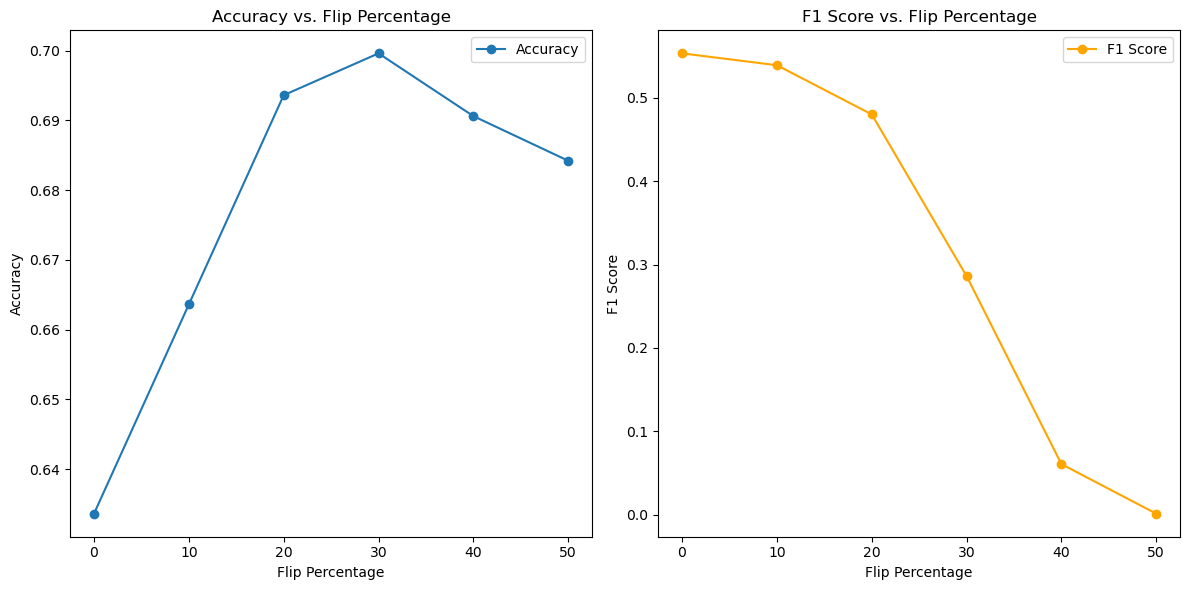

In [37]:
# Plot the accuracy and F1 scores
percentages = [0,10, 20, 30, 40, 50]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(percentages, accuracies, marker='o', label='Accuracy')
plt.xlabel('Flip Percentage')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Flip Percentage')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percentages, f1_scores, marker='o', label='F1 Score', color='orange')
plt.xlabel('Flip Percentage')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Flip Percentage')
plt.legend()

plt.tight_layout()
plt.show()

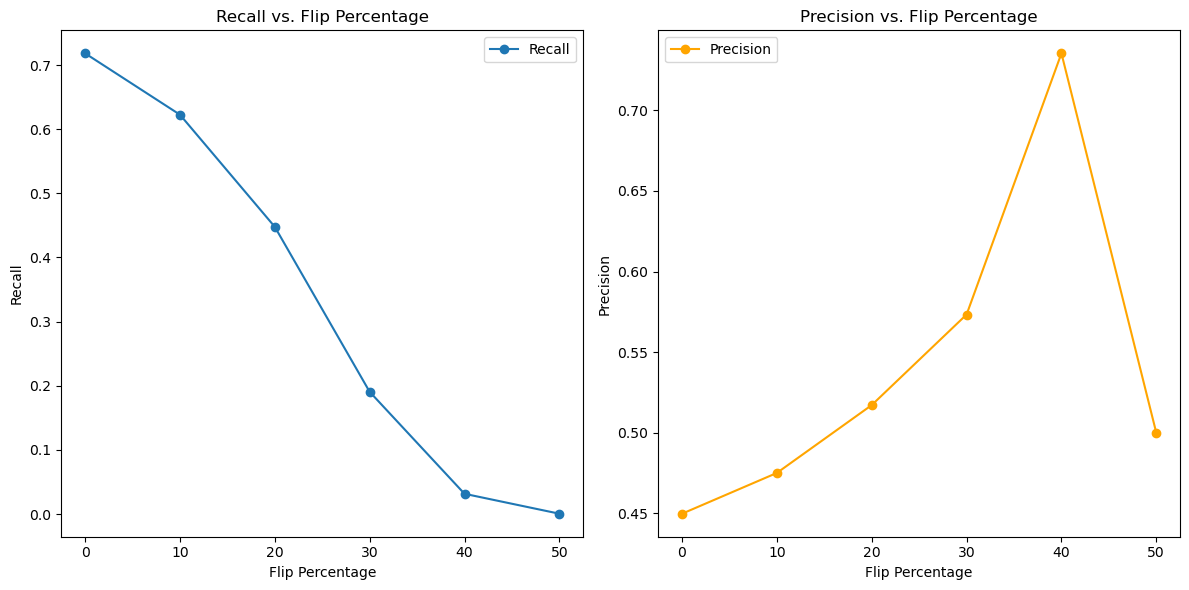

In [38]:
# Plot the accuracy and F1 scores
percentages = [0,10, 20, 30, 40, 50]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(percentages, recalls, marker='o', label='Recall')
plt.xlabel('Flip Percentage')
plt.ylabel('Recall')
plt.title('Recall vs. Flip Percentage')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percentages, precisions, marker='o', label='Precision', color='orange')
plt.xlabel('Flip Percentage')
plt.ylabel('Precision')
plt.title('Precision vs. Flip Percentage')
plt.legend()

plt.tight_layout()
plt.show()

### RF

In [44]:
# Initialize lists to store accuracy and F1 scores
accuracies = []
f1_scores = []
recalls = []
precisions = []

# Loop through each dataset
# write the datasets
flip_percentages = [0,1, 0.2, 0.3, 0.4, 0.5]

for i in range(len(flip_percentages)):
    # Load the dataset
    df = pd.read_csv(f"/Users/A117870943/Documents/DT/Innovation/data/train/scaled/balanced/original_label/balanced_labels_{i}.csv")
    test = pd.read_csv("/Users/A117870943/Documents/DT/Innovation/data/test/scaled/test_scaled.csv")
    #test.rename(columns={'label':'label_flip'},inplace=True}
    # Preprocess the data
    X_train = df.drop(columns=['label','label_flip'],axis=1)
    y_train = df['label_flip']
    
    X_test = test.drop(columns=['label'],axis=1)
    y_test = test['label']
    
    # Train and evaluate the model
    accuracy, f1, recall, precision = train_and_evaluate_rf(X_train, y_train, X_test,y_test)
    
    # Store the results
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recalls.append(recall)
    precisions.append(precision)

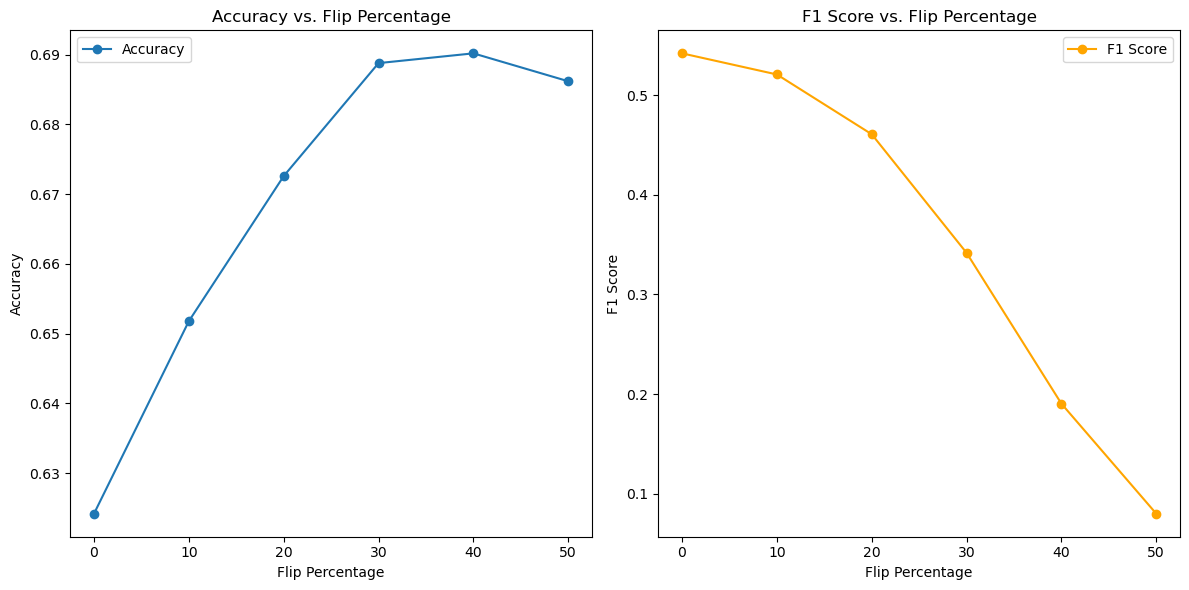

In [45]:
# Plot the accuracy and F1 scores
percentages = [0,10, 20, 30, 40, 50]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(percentages, accuracies, marker='o', label='Accuracy')
plt.xlabel('Flip Percentage')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Flip Percentage')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percentages, f1_scores, marker='o', label='F1 Score', color='orange')
plt.xlabel('Flip Percentage')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Flip Percentage')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Plot the accuracy and F1 scores
percentages = [0,10, 20, 30, 40, 50]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(percentages, recalls, marker='o', label='Recall')
plt.xlabel('Flip Percentage')
plt.ylabel('Recall')
plt.title('Recall vs. Flip Percentage')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percentages, precisions, marker='o', label='Precision', color='orange')
plt.xlabel('Flip Percentage')
plt.ylabel('Precision')
plt.title('Precision vs. Flip Percentage')
plt.legend()

plt.tight_layout()
plt.show()

#### Original

In [58]:
# Initialize lists to store accuracy and F1 scores
accuracies = []
f1_scores = []
recalls = []
precisions = []

# Loop through each dataset
# write the datasets
flip_percentages = [0,1, 0.2, 0.3, 0.4, 0.5]

for i in range(len(flip_percentages)):
    # Load the dataset
    df = pd.read_csv(f"/Users/A117870943/Documents/DT/Innovation/data/train/scaled/balanced/flipped_labels/balanced_labels_{i}.csv")
    test = pd.read_csv("/Users/A117870943/Documents/DT/Innovation/data/test/scaled/test_scaled.csv")
    #test.rename(columns={'label':'label_flip'},inplace=True}
    # Preprocess the data
    X_train = df.drop(columns=['label','label_flip'],axis=1)
    y_train = df['label_flip']
    
    X_test = test.drop(columns=['label'],axis=1)
    y_test = test['label']
    
    # Train and evaluate the model
    accuracy, f1, recall, precision = train_and_evaluate_lr(X_train, y_train, X_test,y_test)
    
    # Store the results
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recalls.append(recall)
    precisions.append(precision)

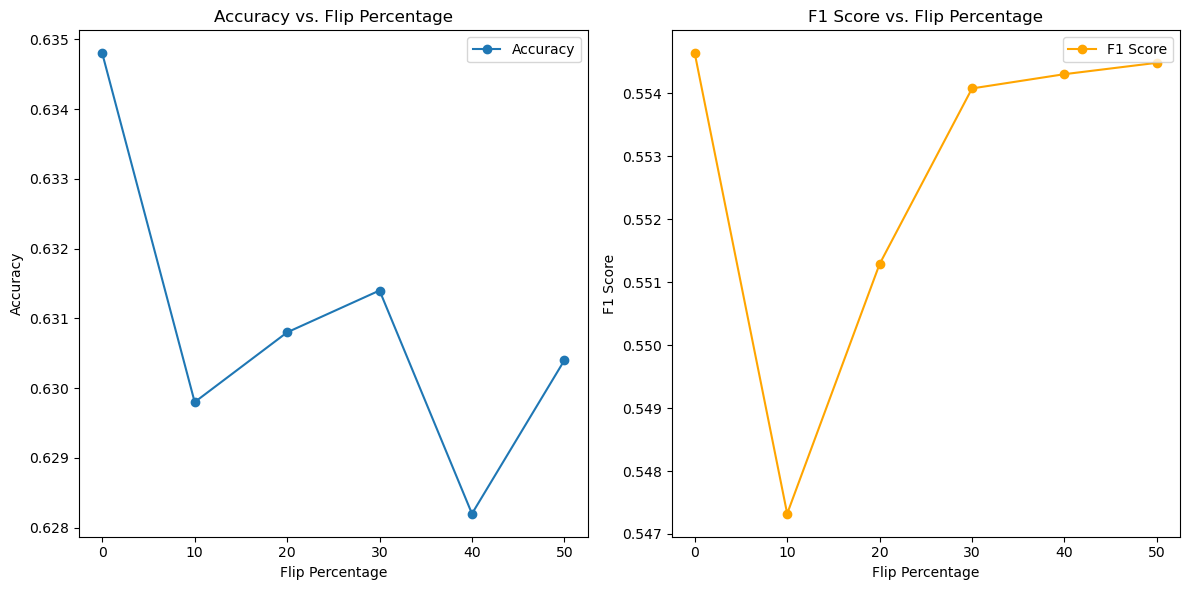

In [59]:
# Plot the accuracy and F1 scores
percentages = [0,10, 20, 30, 40, 50]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(percentages, accuracies, marker='o', label='Accuracy')
plt.xlabel('Flip Percentage')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Flip Percentage')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percentages, f1_scores, marker='o', label='F1 Score', color='orange')
plt.xlabel('Flip Percentage')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Flip Percentage')
plt.legend()

plt.tight_layout()
plt.show()

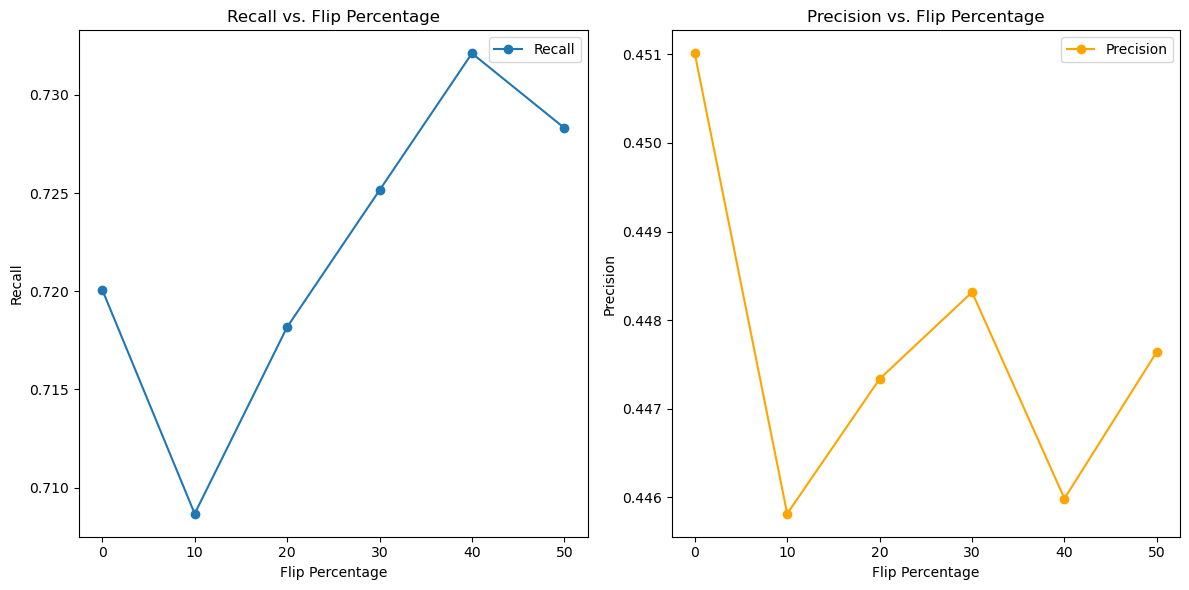

In [60]:
# Plot the accuracy and F1 scores
percentages = [0,10, 20, 30, 40, 50]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(percentages, recalls, marker='o', label='Recall')
plt.xlabel('Flip Percentage')
plt.ylabel('Recall')
plt.title('Recall vs. Flip Percentage')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percentages, precisions, marker='o', label='Precision', color='orange')
plt.xlabel('Flip Percentage')
plt.ylabel('Precision')
plt.title('Precision vs. Flip Percentage')
plt.legend()

plt.tight_layout()
plt.show()

#### with weights

In [75]:
# Initialize lists to store accuracy and F1 scores
accuracies = []
f1_scores = []
recalls = []
precisions = []

# Loop through each dataset
# write the datasets
flip_percentages = [0,1, 0.2, 0.3, 0.4, 0.5]

for i in range(len(flip_percentages)):
    # Load the dataset
    df = pd.read_csv(f"/Users/A117870943/Documents/DT/Innovation/data/train/scaled/balanced/flipped_labels/balanced_labels_{i}.csv")
    print(i)
    print(df.shape)
    print(df.label_flip.value_counts())
    test = pd.read_csv("/Users/A117870943/Documents/DT/Innovation/data/test/scaled/test_scaled.csv")
    #test.rename(columns={'label':'label_flip'},inplace=True}
    # Preprocess the data
    X_train = df.drop(columns=['label','label_flip'],axis=1)
    y_train = df['label_flip']
    
    X_test = test.drop(columns=['label'],axis=1)
    y_test = test['label']
    
    # Train and evaluate the model
    accuracy, f1, recall, precision = train_and_evaluate_lr_wts(X_train, y_train, X_test,y_test)
    
    # Store the results
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recalls.append(recall)
    precisions.append(precision)

0
(31012, 23)
label_flip
1    15506
0    15506
Name: count, dtype: int64
1
(27912, 23)
label_flip
1    13956
0    13956
Name: count, dtype: int64
2
(24810, 23)
label_flip
1    12405
0    12405
Name: count, dtype: int64
3
(21710, 23)
label_flip
1    10855
0    10855
Name: count, dtype: int64
4
(18608, 23)
label_flip
1    9304
0    9304
Name: count, dtype: int64
5
(15506, 23)
label_flip
1    7753
0    7753
Name: count, dtype: int64


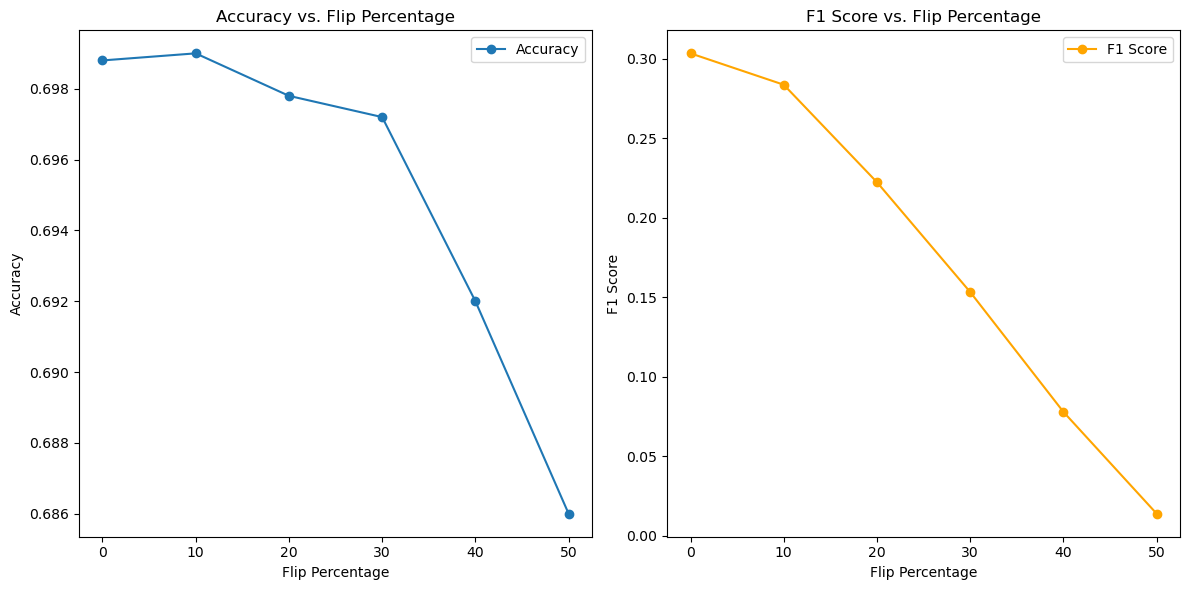

In [74]:
# Plot the accuracy and F1 scores
percentages = [0,10, 20, 30, 40, 50]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(percentages, accuracies, marker='o', label='Accuracy')
plt.xlabel('Flip Percentage')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Flip Percentage')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percentages, f1_scores, marker='o', label='F1 Score', color='orange')
plt.xlabel('Flip Percentage')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Flip Percentage')
plt.legend()

plt.tight_layout()
plt.show()

# Appendix

In [15]:
def balance_datasets(df, label_col):
    balanced_datasets = []
    weights = []


    # Count the number of each label
    label_counts = df[label_col].value_counts()
    if len(label_counts) != 2:
        raise ValueError("Dataset does not have exactly two classes.")
    
    # Identify minority and majority labels
    majority_label = label_counts.idxmax()
    minority_label = label_counts.idxmin()
    # Downsample the majority class
    minority_count = label_counts[minority_label]
    majority_indices = df[df[label_col] == majority_label].index
    minority_indices = df[df[label_col] == minority_label].index
    downsampled_majority_indices = np.random.choice(majority_indices, size=minority_count, replace=False)
    downsampled_indices = np.concatenate([minority_indices, downsampled_majority_indices])
    balanced_df = df.loc[downsampled_indices].reset_index(drop=True)
    # Calculate the reduction factor
    reduction_factor = label_counts[majority_label] / minority_count
    # Calculate the weights
    weight_majority = reduction_factor
    weight_minority = 1.0

    weights.append({majority_label: weight_majority, minority_label: weight_minority})

    return balanced_df, weights

In [28]:
def balance_datasets(datasets, label_col):
    balanced_datasets = []
    weights = []

    for df in datasets:
        # Count the number of each label
        label_counts = df[label_col].value_counts()

        if len(label_counts) != 2:
            raise ValueError("Dataset does not have exactly two classes.")
        
        # Identify minority and majority labels
        majority_label = label_counts.idxmax()
        minority_label = label_counts.idxmin()

        # Downsample the majority class
        minority_count = label_counts[minority_label]
        majority_indices = df[df[label_col] == majority_label].index
        minority_indices = df[df[label_col] == minority_label].index

        downsampled_majority_indices = np.random.choice(majority_indices, size=minority_count, replace=False)
        downsampled_indices = np.concatenate([minority_indices, downsampled_majority_indices])

        balanced_df = df.loc[downsampled_indices].reset_index(drop=True)
        balanced_datasets.append(balanced_df)

        # Calculate the reduction factor
        reduction_factor = label_counts[majority_label] / minority_count

        # Calculate the weights
        weight_majority = reduction_factor
        weight_minority = 1.0

        weights.append({majority_label: weight_majority, minority_label: weight_minority})

    return balanced_datasets, weights

def flip_labels_maintain_imbalance(df, label_col, flip_percentages):
    original_label_counts = df[label_col].value_counts()
    original_imbalance_ratio = original_label_counts[0] / original_label_counts[1]

    results = []

    for percentage in flip_percentages:
        df_result = df.copy()
        df_result['label_flip'] = df_result[label_col]
        num_to_flip = int(percentage * original_label_counts[1])

        # Get indices of label 1
        label_1_indices = df_result[df_result[label_col] == 1].index

        # Randomly select indices to flip
        flip_indices = np.random.choice(label_1_indices, size=num_to_flip, replace=False)

        # Flip the selected labels
        df_result.loc[flip_indices, 'label_flip'] = 0

        # Calculate the number of label 0 to remove to maintain the imbalance ratio
        new_label_flip_counts = df_result['label_flip'].value_counts()
        num_to_remove = new_label_flip_counts[0] - int(original_imbalance_ratio * new_label_flip_counts[1])

        if num_to_remove > 0:
            # Get indices of label 0
            label_0_indices = df_result[df_result['label_flip'] == 0].index

            # Exclude the flipped indices from the label 0 indices
            remaining_label_0_indices = label_0_indices.difference(flip_indices)

            # Randomly select indices to remove
            remove_indices = np.random.choice(remaining_label_0_indices, size=num_to_remove, replace=False)

            # Remove the selected indices
            df_result = df_result.drop(remove_indices)

        results.append(df_result)

    return results


def train_and_evaluate(X_train, y_train, X_test,y_test):

    
    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, f1, recall, precision

In [62]:
def train_and_evaluate_lr(X_train, y_train, X_test,y_test):

    weights = {0: 2.2245582355217337, 1: 1.0}
    # Train logistic regression model
    model = LogisticRegression() #class_weight='balanced'
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, f1, recall, precision

In [69]:
def train_and_evaluate_lr_wts(X_train, y_train, X_test,y_test):

    weights = {0: 2.2245582355217337, 1: 1.0}
    # Train logistic regression model
    model = LogisticRegression(class_weight=weights) 
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, f1, recall, precision